In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from dbscan import DBSCAN as dscan

# Load digit dataset

In [3]:
digits = load_digits()

In [4]:
X = np.array(digits.data)
y = np.array(digits.target)

In [5]:
X_scaled = scale(X)

In [6]:
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

# Let's try sklearn's DBSCAN

In [7]:
db = DBSCAN(eps=0.4, min_samples=14)

In [8]:
db.fit(X_reduced)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=14, n_jobs=None, p=None)

In [9]:
print('Estimated number of clusters: %d' % len(np.unique(db.labels_)))
print("Homogeneity: %0.3f" % homogeneity_score(y, db.labels_))
print("Completeness: %0.3f" % completeness_score(y, db.labels_))
print("V-measure: %0.3f" % v_measure_score(y, db.labels_))

Estimated number of clusters: 10
Homogeneity: 0.243
Completeness: 0.416
V-measure: 0.307


In [10]:
print("Adjusted Rand Index: %0.3f"
      % adjusted_rand_score(y, db.labels_))
print("Adjusted Mutual Information: %0.3f"
      % adjusted_mutual_info_score(y, db.labels_))
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_reduced, db.labels_))

Adjusted Rand Index: 0.129
Adjusted Mutual Information: 0.297
Silhouette Coefficient: -0.228


In [11]:
num_cluster = len(np.unique(y))

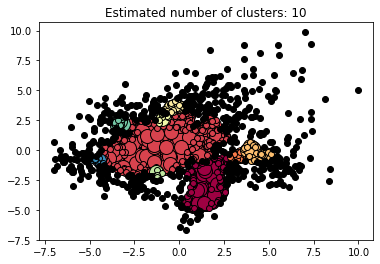

In [12]:
unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (db.labels_ == k)

    xy = X_reduced[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_reduced[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % len(np.unique(db.labels_)))
plt.show()

# Now our implementation

In [13]:
db1 = dscan(eps=0.4, min_samples=13)

In [14]:
db1.fit(X_reduced)

In [15]:
print('Estimated number of clusters: %d' % len(np.unique(db1.labels_)))
print("Homogeneity: %0.3f" % homogeneity_score(y, db1.labels_))
print("Completeness: %0.3f" % completeness_score(y, db1.labels_))
print("V-measure: %0.3f" % v_measure_score(y, db1.labels_))

Estimated number of clusters: 10
Homogeneity: 0.237
Completeness: 0.420
V-measure: 0.303


In [16]:
print("Adjusted Rand Index: %0.3f"
      % adjusted_rand_score(y, db1.labels_))
print("Adjusted Mutual Information: %0.3f"
      % adjusted_mutual_info_score(y, db1.labels_))
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_reduced, db1.labels_))

Adjusted Rand Index: 0.127
Adjusted Mutual Information: 0.293
Silhouette Coefficient: -0.243


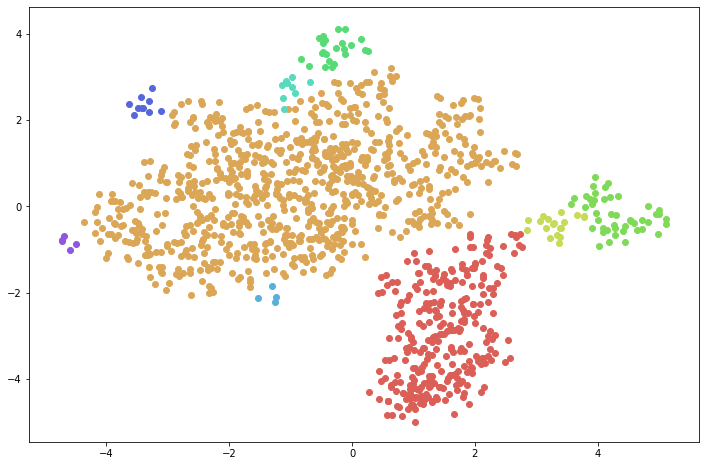

In [17]:
palette = sns.color_palette("hls", num_cluster + 1)
_, ax = plt.subplots(figsize=(12, 8))

for i, index in enumerate(range(len(db1.clusters_))):
    point = np.array(X_reduced[db1.clusters_[index]]).T
    ax.scatter(*point, c=[palette[i], ])

plt.show()